In [4]:
!python -m ipykernel install --user --name=venv --display-name "Python (sunspots)"


Installed kernelspec venv in C:\Users\pranav\AppData\Roaming\jupyter\kernels\venv


In [5]:
%pip install torch torchvision matplotlib opencv-python pillow



Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install -U ultralytics  

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [7]:
!pip install -U torch torchvision

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached torchvision-0.20.1-cp312-cp312-win_amd64.whl (1.6 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.2.0
    Uninstalling torch-2.2.0:
      Successfully uninstalled torch-2.2.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.17.0
    Uninstalling torchvision-0.17.0:
      Successfully uninstalled torchvision-0.17.0


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.0 requires torch==2.2.0, but you have torch 2.5.1 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [8]:
import os
import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


In [9]:
# Set paths for dataset
train_images_path = "D:/SEM-5/Summer Intership-Dhee Centre of Excellence/Sunspots/train/images"
train_labels_path = "D:/SEM-5/Summer Intership-Dhee Centre of Excellence/Sunspots/train/labels"
valid_images_path = "D:/SEM-5/Summer Intership-Dhee Centre of Excellence/Sunspots/valid/images"
valid_labels_path = "D:/SEM-5/Summer Intership-Dhee Centre of Excellence/Sunspots/valid/labels"

# Ensure paths are correct
assert os.path.exists(train_images_path), f"Path not found: {train_images_path}"
assert os.path.exists(valid_images_path), f"Path not found: {valid_images_path}"


In [14]:
# Create YOLOv8 model
model = YOLO("yolov8n.pt")  # YOLOv8 nano model, replace with yolov8s.pt for better accuracy

# Prepare dataset YAML
data_yaml = """
train: D:/SEM-5/Summer Intership-Dhee Centre of Excellence/Sunspots/train/images
val: D:/SEM-5/Summer Intership-Dhee Centre of Excellence/Sunspots/valid/images

nc: 1
names: ['sunspot']

"""

with open("sunspots.yaml", "w") as f:
    f.write(data_yaml)

# Train the model
model.train(data="sunspots.yaml", epochs=5, imgsz=640, batch=16)


New https://pypi.org/project/ultralytics/8.3.49 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.31  Python-3.8.19 torch-2.4.1+cpu CPU (Intel Core(TM) i5-1035G1 1.00GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=sunspots.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

train: Scanning D:\SEM-5\Summer Intership-Dhee Centre of Excellence\sunspots\train\labels.cache... 3249 images, 816 backgrounds, 0 corrupt: 100%|██████████| 3249/3249 [00:00<?, ?it/s]
val: Scanning D:\SEM-5\Summer Intership-Dhee Centre of Excellence\sunspots\valid\labels.cache... 600 images, 158 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<?, ?it/s]

Plotting labels to runs\detect\train5\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.877      2.331     0.9945          1        640: 100%|██████████| 204/204 [30:44<00:00,  9.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [02:08<00:00,  6.75s/it]


                   all        600       1578      0.734       0.74      0.792      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.775      1.316     0.9936          6        640: 100%|██████████| 204/204 [28:46<00:00,  8.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:53<00:00,  5.97s/it]


                   all        600       1578      0.764      0.776      0.802      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.711      1.083     0.9814          5        640: 100%|██████████| 204/204 [28:11<00:00,  8.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:52<00:00,  5.91s/it]

                   all        600       1578      0.799      0.767      0.832      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.636     0.9964      0.955          7        640: 100%|██████████| 204/204 [29:09<00:00,  8.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:48<00:00,  5.70s/it]

                   all        600       1578      0.814      0.809      0.885      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.552     0.9096     0.9357          7        640: 100%|██████████| 204/204 [27:31<00:00,  8.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:57<00:00,  6.18s/it]

                   all        600       1578       0.76      0.807      0.867      0.472



5 epochs completed in 2.574 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.31  Python-3.8.19 torch-2.4.1+cpu CPU (Intel Core(TM) i5-1035G1 1.00GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [01:37<00:00,  5.15s/it]


                   all        600       1578      0.811       0.81      0.885      0.483
Speed: 4.2ms preprocess, 144.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs\detect\train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000022AA3267FD0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [16]:
import shutil

# Move and rename the trained model
shutil.move("D:/SEM-5/Summer Intership-Dhee Centre of Excellence/runs/detect/train5/weights/best.pt", "trained_sunspot_model.pt")


'trained_sunspot_model.pt'

In [17]:
# Perform inference
results = model.predict(source="D:/SEM-5/Summer Intership-Dhee Centre of Excellence/test", conf=0.25, save=True)

# Display detections
for result in results:
    print(f"Image: {result.path}, Sunspots Count: {len(result.boxes)}")



image 1/10 D:\SEM-5\Summer Intership-Dhee Centre of Excellence\test\12100503CN_jpg.rf.3ed897436ef7a5855d332120255fcc74.jpg: 640x640 4 sunspots, 120.9ms
image 2/10 D:\SEM-5\Summer Intership-Dhee Centre of Excellence\test\12100903CN_jpg.rf.37230ae61907d1b8876bdcf229187c81.jpg: 640x640 3 sunspots, 103.5ms
image 3/10 D:\SEM-5\Summer Intership-Dhee Centre of Excellence\test\12101308CN_jpg.rf.2acae17eb0f5db736525424775745f71.jpg: 640x640 4 sunspots, 115.1ms
image 4/10 D:\SEM-5\Summer Intership-Dhee Centre of Excellence\test\12101904CN_jpg.rf.579fac4c8ce67f2db2ba1d0da82f4163.jpg: 640x640 4 sunspots, 106.5ms
image 5/10 D:\SEM-5\Summer Intership-Dhee Centre of Excellence\test\12102002CN_jpg.rf.2a092f3131af77cba5c85be6b6d87bcf.jpg: 640x640 8 sunspots, 113.6ms
image 6/10 D:\SEM-5\Summer Intership-Dhee Centre of Excellence\test\12102413CN_jpg.rf.ebd4a512ec716d1744b301b52db4c7a7.jpg: 640x640 3 sunspots, 112.5ms
image 7/10 D:\SEM-5\Summer Intership-Dhee Centre of Excellence\test\12102702CN_jpg.rf.a


image 1/1 D:\SEM-5\Summer Intership-Dhee Centre of Excellence\test\12101308CN_jpg.rf.2acae17eb0f5db736525424775745f71.jpg: 640x640 4 sunspots, 138.9ms
Speed: 6.7ms preprocess, 138.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Bounding Boxes: tensor([[226.0189, 270.7466, 234.1211, 278.8626],
        [ 97.6743, 171.3662, 115.1954, 188.9420],
        [ 14.1006, 184.5082,  21.6745, 196.6880],
        [ 88.1544, 324.8317,  94.1575, 330.9764]])
Classes: tensor([0., 0., 0., 0.])
Confidences: tensor([0.7523, 0.7227, 0.6523, 0.4598])


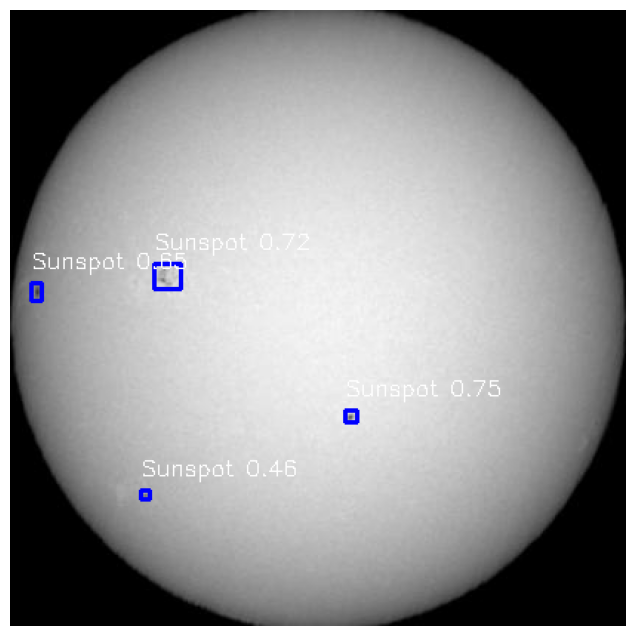

In [20]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Ensure inline plotting
%matplotlib inline

# Image path
image_path = "D:/SEM-5/Summer Intership-Dhee Centre of Excellence/test/12101308CN_jpg.rf.2acae17eb0f5db736525424775745f71.jpg"

# Predict with the YOLO model
results = model.predict(source=image_path, conf=0.25, save=False)[0]

# Debug: Print results
print("Bounding Boxes:", results.boxes.xyxy)
print("Classes:", results.boxes.cls)
print("Confidences:", results.boxes.conf)

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    print("Error: Unable to load the image. Check the file path.")
else:
    # Draw bounding boxes and labels
    for box, cls, conf in zip(results.boxes.xyxy, results.boxes.cls, results.boxes.conf):
        x1, y1, x2, y2 = map(int, box)  # Extract box coordinates
        label = f"Sunspot {conf:.2f}"  # Create label with confidence
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw rectangle
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # Convert BGR to RGB for Matplotlib visualization
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()
